In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import os
import sys
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format='{:,.2f}'.format    # Setting the display option of float values as 2
pd.set_option('display.width',85)       #Setting the width of columns as a standard width
pd.set_option('display.max_columns',8)  # View max of 8 columns only

In [3]:
root=tk.Tk()
root.withdraw()
file1=filedialog.askopenfilename(title="Browse the required file...")
mld=pd.read_excel(file1)
mld.head()

,OCD,HLD,OLD,OHD,DAY,Shares Traded,RESULT
0,0.72,0.93,0.87,0.06,RED,Below 10 Cr,Profit
1,0.88,1.57,0.55,1.02,GREEN,Below 10 Cr,Loss
2,0.31,0.70,0.24,0.46,GREEN,Below 10 Cr,Profit
3,1.86,2.53,0.40,2.13,GREEN,Below 10 Cr,Profit
4,0.44,2.16,1.08,1.07,GREEN,Below 10 Cr,Profit


<function matplotlib.pyplot.show(close=None, block=None)>

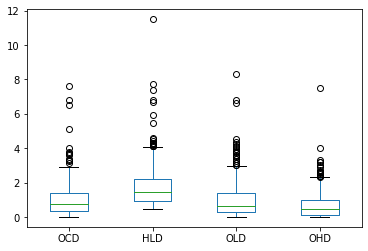

In [4]:
df=pd.DataFrame(data=mld,columns=['OCD','HLD','OLD','OHD'])
df.plot(kind='box')
plt.show

In [5]:
logcolumns = ['OCD', 'HLD', 'OLD', 'OHD']
mld[logcolumns]=np.log(mld[logcolumns])
mld.head()

<ipython-input-5-669b1b510ad4>:2: RuntimeWarning: divide by zero encountered in log
  mld[logcolumns]=np.log(mld[logcolumns])


,OCD,HLD,OLD,OHD,DAY,Shares Traded,RESULT
0,-0.33,-0.07,-0.13,-2.88,RED,Below 10 Cr,Profit
1,-0.13,0.45,-0.60,0.02,GREEN,Below 10 Cr,Loss
2,-1.16,-0.36,-1.42,-0.78,GREEN,Below 10 Cr,Profit
3,0.62,0.93,-0.91,0.76,GREEN,Below 10 Cr,Profit
4,-0.82,0.77,0.08,0.07,GREEN,Below 10 Cr,Profit


<function matplotlib.pyplot.show(close=None, block=None)>

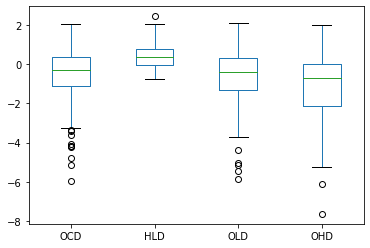

In [6]:
df=pd.DataFrame(data=mld,columns=['OCD','HLD','OLD','OHD'])
df.plot(kind='box')
plt.show

In [7]:
from scipy.stats import mstats
def WinsorizeStats(data):
    out = mstats.winsorize(data, limits=[0.05, 0.05])
    return out

In [8]:
mld['OCD']=WinsorizeStats(mld['OCD'])
mld['HLD']=WinsorizeStats(mld['HLD'])
mld['OLD']=WinsorizeStats(mld['OLD'])
mld['OHD']=WinsorizeStats(mld['OHD'])

<function matplotlib.pyplot.show(close=None, block=None)>

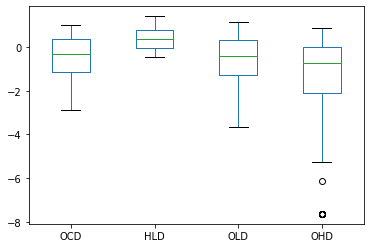

In [9]:
df=pd.DataFrame(data=mld,columns=['OCD','HLD','OLD','OHD'])
df.plot(kind='box')
plt.show

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
mld_1=mld.apply(le.fit_transform)
mld_1.head()

,OCD,HLD,OLD,OHD,DAY,Shares Traded,RESULT
0,147,58,173,35,1,2,1
1,171,175,123,234,0,2,0
2,60,12,60,146,0,2,1
3,263,257,88,292,0,2,1
4,99,226,200,241,0,2,1


In [11]:
mld_1.to_excel("output.xlsx")